# Kimiya Ghanai codes for Machine Learning

## 2nd code: Polynomial Linear Regression

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("Electricity.csv")
df.head()

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
0,2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
1,2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2,2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
3,2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
4,2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30


## Examining Correlation between Production and other components

In [19]:
numeric_df = df.select_dtypes(include=['int64','float64'])
correlation = numeric_df.corr()['Consumption'].sort_values(ascending=False)
correlation

Consumption      1.000000
Production       0.695097
Oil and Gas      0.488947
Coal             0.461859
Biomass          0.398717
Hydroelectric    0.293210
Nuclear          0.127617
Solar            0.126887
Wind             0.084882
Name: Consumption, dtype: float64

## Drawing the chart

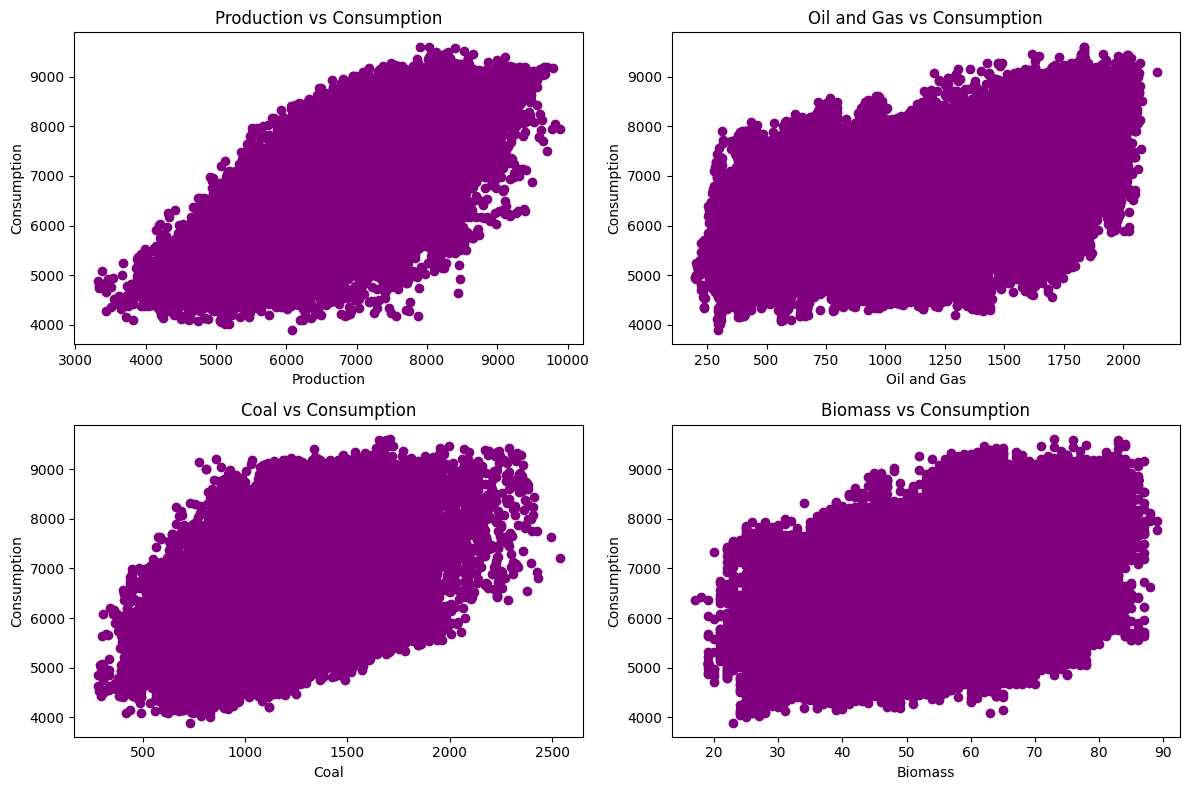

In [20]:
features = ['Production', 'Oil and Gas', 'Coal', 'Biomass']

plt.figure(figsize=(12, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    plt.scatter(df[feature], df['Consumption'], color='purple')
    plt.xlabel(feature)
    plt.ylabel('Consumption')
    plt.title(f'{feature} vs Consumption')

plt.tight_layout()
plt.show()

## Drawing the Linear Regression

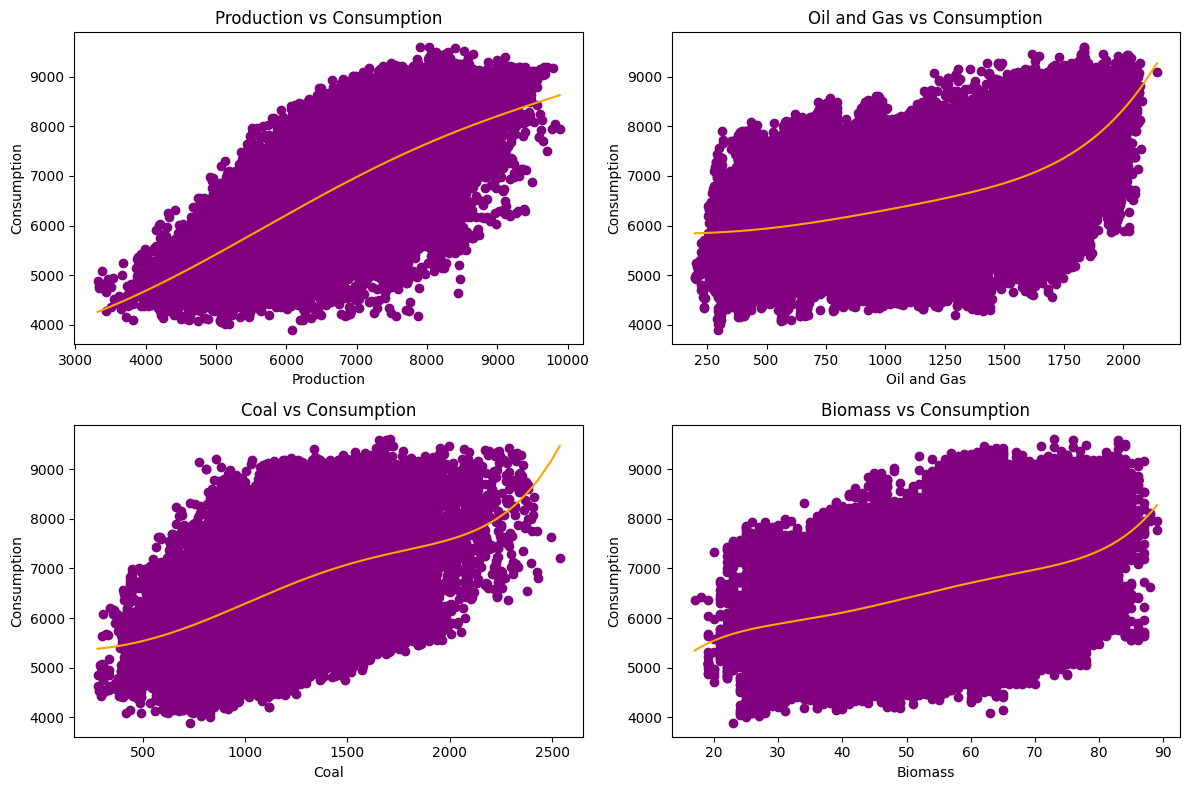

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
plt.figure(figsize=(12, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    
    x = df[[feature]].values
    y = df['Consumption'].values
    poly = PolynomialFeatures(degree=5)
    x_poly = poly.fit_transform(x)
    model = LinearRegression()
    model.fit(x_poly, y)
    y_pred = model.predict(x_poly)
    
    sort_index = x[:,0].argsort()
    x_sorted = x[sort_index]
    y_pred_sorted = y_pred[sort_index]
    
    plt.scatter(x, y,color='purple')
    plt.plot(x_sorted, y_pred_sorted, color='orange')
    plt.xlabel(feature)
    plt.ylabel('Consumption')
    plt.title(f'{feature} vs Consumption')

plt.tight_layout()
plt.show()

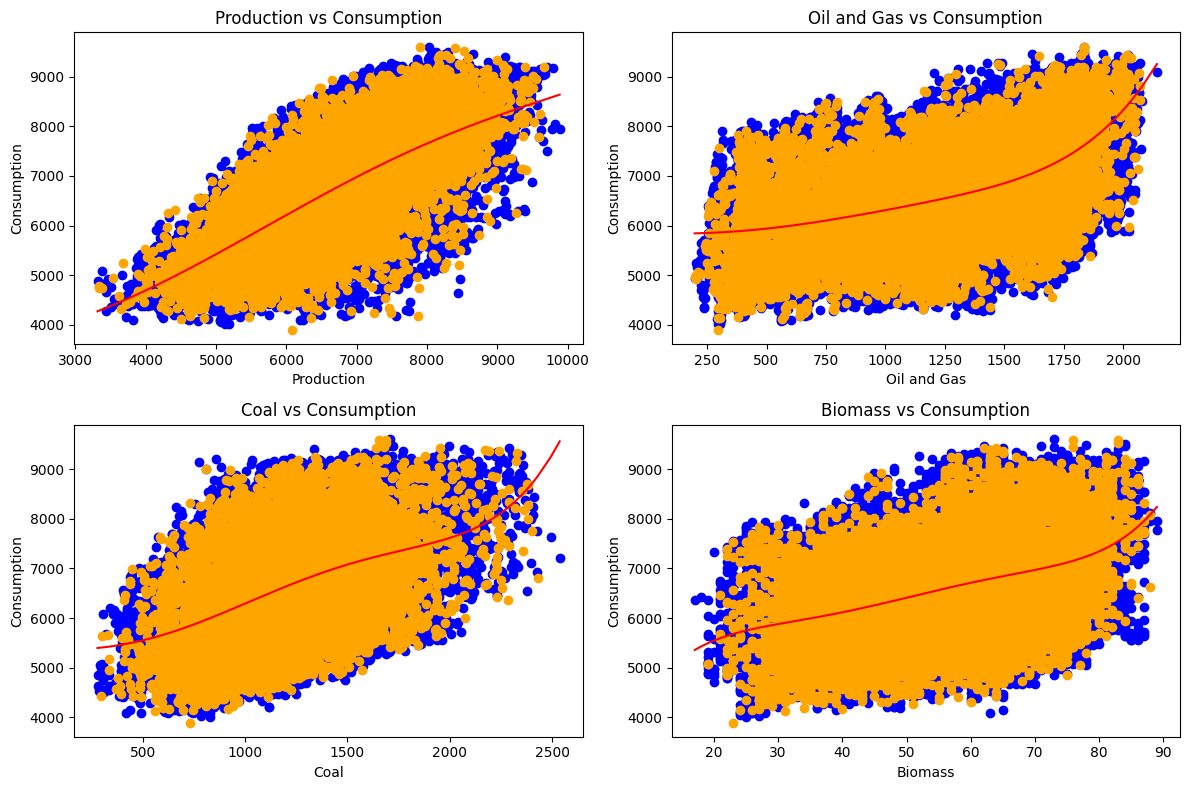

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
plt.figure(figsize=(12, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)

    x = df[[feature]].values
    y = df['Consumption'].values
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    poly = PolynomialFeatures(degree=5)
    x_poly = poly.fit_transform(x_train)
    
    model = LinearRegression()
    model.fit(x_poly, y_train)
    y_pred = model.predict(x_poly)

    sort_index = x_train[:,0].argsort()
    x_sorted = x_train[sort_index]
    y_pred_sorted = y_pred[sort_index]
    
    plt.scatter(x_train, y_train, color='blue')
    plt.scatter(x_test, y_test, color='orange')
    plt.plot(x_sorted, y_pred_sorted, color='red')
    plt.xlabel(feature)
    plt.ylabel('Consumption')
    plt.title(f'{feature} vs Consumption')

plt.tight_layout()
plt.show()